# About

Test script for running instances of Vision Transformers onto the connectome dataset.

# Libraries

In [1]:
import torch
import numpy as np
from scipy import io
import pandas
import os
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import matplotlib.pyplot as plt

# Check GPU

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device_name = torch.cuda.get_device_name(0)
print('Using {} device'.format(device))
print('Device name: {}'.format(device_name))
print('Number of cores: {}'.format(torch.cuda.device_count()))

Using cuda device
Device name: NVIDIA GeForce GTX 1070 Ti
Number of cores: 1


# Directories

In [3]:
dirData = os.path.join(os.getcwd(), 'data', 'connectome', 'SickKidsConnectomes')
dirRegions = os.path.join(dirData, 'HCP-MMP1_UniqueRegionList.csv')

# Functional Connectome data:
dirFunCon = os.path.join(dirData, 'WholeBrain_FunctionalConnectomesMat')
listDirFuns = os.listdir(dirFunCon) # Matlab script

# Import data

In [4]:
regionTable = pandas.read_csv(dirRegions)
regionNames = regionTable['regionLongName'].values
X = regionTable['x-cog'].values
Y = regionTable['y-cog'].values
Z = regionTable['z-cog'].values

coords = np.column_stack((X,Y,Z))
rads = regionTable['volmm'] / 10
N = regionNames.size

# Categorize the regions

Here, we categorize the regions into collections of groups based on the following:
 - Cortex
 - Lobe
 - LR hemi (this is more to divide each collection into two)
 - proximity of 3D spatial coordinate (clustering)

## Categorize by label:

In [5]:
# Function to categorize:
def obtainCollection(listNames):
    '''
    Function for obtaining a collection of groups (sublists) with indices that correspond to common names.
    '''
    
    N = len(list(listNames))
    collectionNames = []
    collectionInds = []
    
    for i in range(N):
        name = listNames[i]
        if name in collectionNames:
            ind = collectionNames.index(name)
            collectionInds[ind].append(i)
        
        else:
            collectionNames.append(name)
            collectionInds.append([i])
    
    return (collectionNames, collectionInds)

In [6]:
# Cortex type
cortexList = regionTable['cortex'].values
cortexNames, cortexInds = obtainCollection(cortexList)

# Lobe type 
lobeList = regionTable['Lobe'].values
lobeNames, lobeInds = obtainCollection(lobeList)

## Categorize by proximity:

# Display the nodes as a 3D plot

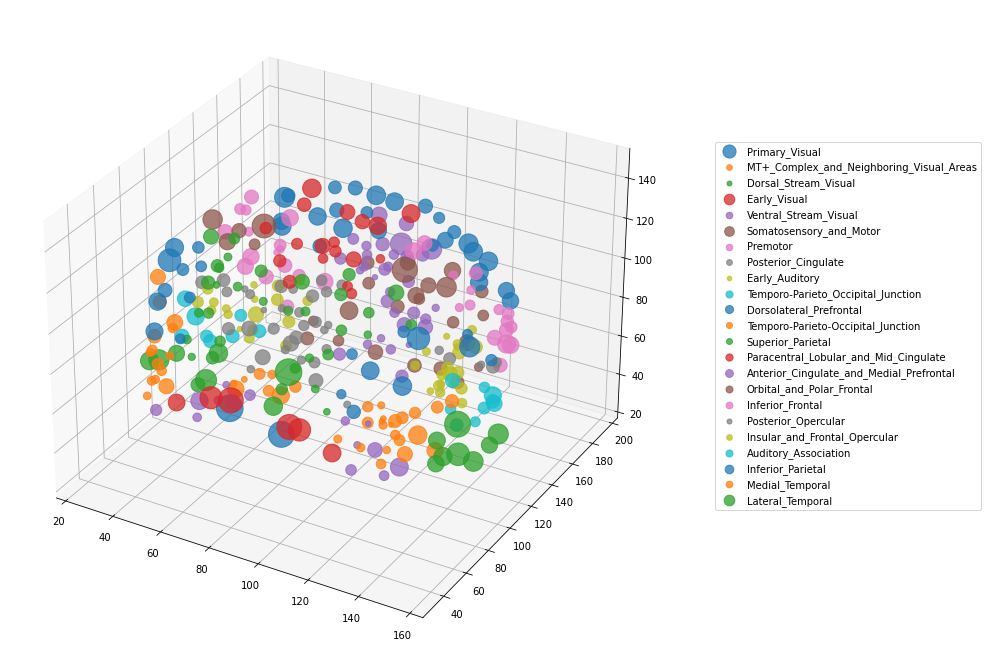

In [7]:
# Colour code the nodes in accordance to each collection
fig = plt.figure(figsize=(16,12))

ax = fig.add_subplot(projection='3d')

# Plot different colours based on labels:
collectionNames = cortexNames
collectionInds = cortexInds

for k in range(len(collectionNames)):
    inds = collectionInds[k]
    ax.scatter3D(X[inds], Y[inds], Z[inds], s=rads[inds], alpha=0.75)
    
ax.legend(collectionNames, loc='upper right', markerscale=0.5, bbox_to_anchor=(1.5,0.8))

# Import and package data

Now, we import all participant data and package them accordingly.

In [8]:
# Import functional connectomes
dictArrs = {}

for k in range(len(listDirFuns)):
    
    # Directories:
    patientName = listDirFuns[k]
    dirFile = os.path.join(dirFunCon, patientName)
    dictWhole = io.loadmat(dirFile)
    arrWhole = dictWhole['arr']
    
    dictArrs[patientName[:-4]] = arrWhole.copy()

In [10]:
dictArrs['ST01']

(360, 360, 5)